# Impleting Linear Regression And Logical Regression


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
! pip install scikit_learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df= pd.read_csv('dataset.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df1= df.select_dtypes(include= np.number)

In [6]:
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Linear Regression with single input 

In [8]:
x= df1[['TotalWorkingYears']].head(50) 
y= df1['MonthlyIncome'].head(50)

In [9]:
lr= LinearRegression()

In [10]:
lr

LinearRegression()

In [11]:
x.shape, y.shape

((50, 1), (50,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40, 1), (40,), (10, 1), (10,))

In [35]:
x_train, y_train, x_test, y_test

(    TotalWorkingYears
 33                 19
 30                  7
 10                  6
 2                   7
 32                 10
 31                  9
 40                  1
 12                  5
 20                  5
 26                 10
 34                  6
 1                  10
 22                 13
 49                  1
 17                  1
 23                  0
 37                  2
 35                  6
 19                  6
 4                   6
 44                 12
 16                  7
 5                   8
 21                 10
 9                  17
 8                  10
 3                   8
 6                  12
 11                 10
 45                 23
 15                 10
 48                 14
 36                  3
 38                  6
 42                  1
 14                  6
 46                 10
 27                 10
 28                 24
 7                   1,
 17     2935
 14     2028
 38     3419
 43     8726
 0  

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
y_predict = lr.predict(x_test)

In [38]:
y_predict

array([5611.62878541, 6126.21711169, 5979.19187561, 5611.62878541,
       4582.45213286, 5611.62878541, 3920.8385705 , 5538.11616737,
       4288.4016607 , 5464.60354933])

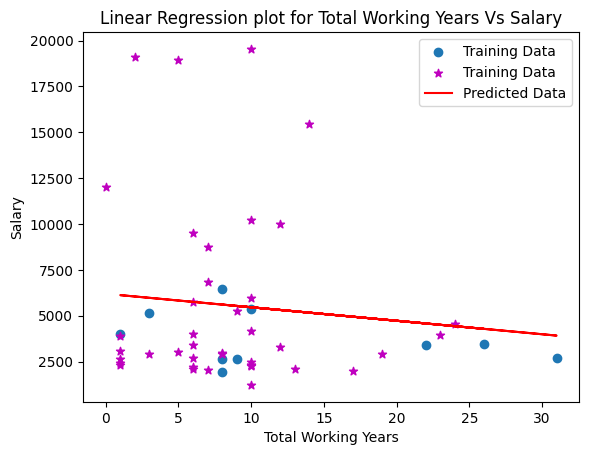

In [39]:
plt.scatter(x_test, y_test, label= "Training Data")
plt.scatter(x_train, y_train, color= 'm', marker= '*', label= "Training Data")
plt.plot(x_test, y_predict, color = 'red', label= "Predicted Data")
plt.xlabel('Total Working Years')
plt.ylabel('Salary')
plt.title('Linear Regression plot for Total Working Years Vs Salary')
plt.legend()


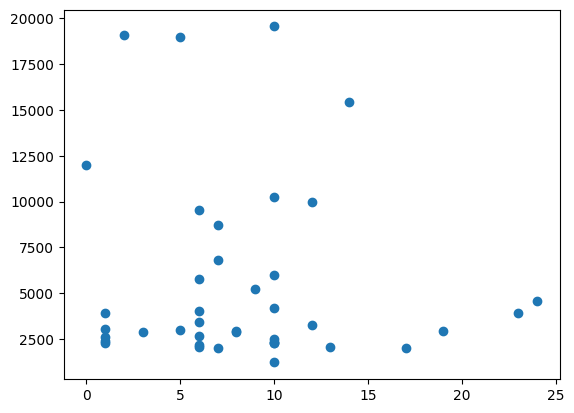

In [40]:
plt.scatter(x_train, y_train )

# Linear Regression with Multiple input

In [41]:
x_m = df1[['TotalWorkingYears', 'Education', 'YearsAtCompany',
'JobLevel']].head(50)

In [42]:
x_m

,TotalWorkingYears,Education,YearsAtCompany,JobLevel
0,8,2,6,2
1,10,1,10,2
2,7,2,0,1
3,8,4,8,1
4,6,1,2,1
5,8,2,7,1
6,12,3,1,1
7,1,1,1,1
8,10,3,9,3
9,17,3,7,2


In [48]:
x_m_train, x_m_test, y_train, y_test = train_test_split(x_m, y,
test_size=0.2)

In [50]:
x_m_train.shape, x_m_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [51]:
lr.fit(x_m_train, y_train)

LinearRegression()

In [52]:
y_m_predict = lr.predict(x_m_test)

In [53]:
y_m_predict

array([2312.57767803, 2302.35353354, 2169.46158435, 2117.38018906,
       6201.8252862 , 2341.76694294, 6115.99094328, 2159.23743986,
       2076.61971733, 2451.130089  ])

In [54]:
lr.predict([[10, 5, 3, 2]])

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6062.17609616])

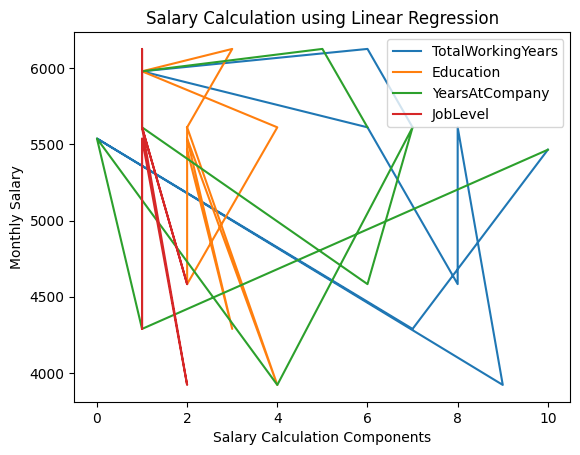

In [56]:
plt.plot(x_m_test['TotalWorkingYears'], y_predict, label =
"TotalWorkingYears")
plt.plot(x_m_test['Education'], y_predict, label = "Education")
plt.plot(x_m_test['YearsAtCompany'], y_predict, label =
"YearsAtCompany")
plt.plot(x_m_test['JobLevel'], y_predict, label = "JobLevel")
plt.xlabel("Salary Calculation Components")
plt.ylabel("Monthly Salary")
plt.title("Salary Calculation using Linear Regression")
plt.legend()

In [64]:
df.columns

(['Age', 'Attrition', 'BusinessTravel', 'DailyRate',
'Department',
       'DistanceFromHome', 'Education', 'EducationField',
'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours',
'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear',
'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole',
'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      'object')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [75]:
df1.columns


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [79]:
LRx=df1[['Age', 'DistanceFromHome', 'JobSatisfaction','MonthlyIncome',
'StandardHours' ]].head(50)



In [81]:
LRx

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,StandardHours
0,41,1,4,5993,80
1,49,8,2,5130,80
2,37,2,3,2090,80
3,33,3,3,2909,80
4,27,2,2,3468,80
5,32,2,4,3068,80
6,59,3,1,2670,80
7,30,24,3,2693,80
8,38,23,3,9526,80
9,36,27,3,5237,80


In [85]:
LRx_train, LRx_test = train_test_split(LRx, test_size=0.2)

In [89]:
LRx_train.shape, LRx_test.shape

((40, 5), (10, 5))